# The Hired Hand

**Machine Learning for Job Placement Prediction**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Angry-Jay/ML_TheHiredHand/blob/main/ml-the-hired-hand.ipynb)

---

## Table of Contents

1. [Project & Dataset Description](#1-project--dataset-description)
   - [1.1 Project Aim](#11-project-aim)
   - [1.2 Existing Solutions](#12-existing-solutions)
   - [1.3 Dataset Information](#13-dataset-information)
2. [Library Imports](#2-library-imports)
3. [Data Access](#3-data-access)
4. [Dataset Exploratory Analysis](#4-dataset-exploratory-analysis)
   - [4.1 Metadata Analysis](#41-metadata-analysis)
   - [4.2 Missing Values Analysis](#42-missing-values-analysis)
   - [4.3 Feature Distributions, Scaling & Outliers](#43-feature-distributions-scaling--outliers)
   - [4.4 Target Feature Study](#44-target-feature-study)
   - [4.5 Feature Correlation & Selection](#45-feature-correlation--selection)
   - [4.6 Unsupervised Clustering](#46-unsupervised-clustering)
   - [4.7 Interpretations & Conclusions](#47-interpretations--conclusions)
5. [ML Baseline & Ensemble Models](#5-ml-baseline--ensemble-models)
   - [5.1 Train/Validation/Test Splits](#51-trainvalidationtest-splits)
   - [5.2 Pipelines & Models](#52-pipelines--models)
   - [5.3 Training & Validation](#53-training--validation)
   - [5.4 Testing](#54-testing)
   - [5.5 Results Interpretation & Discussion](#55-results-interpretation--discussion)
6. [Enhanced Models & Hyperparameter Tuning](#6-enhanced-models--hyperparameter-tuning)
   - [6.1 Justification of Choices](#61-justification-of-choices)
   - [6.2 Hyperparameter Optimization](#62-hyperparameter-optimization)
   - [6.3 Final Results & Analysis](#63-final-results--analysis)
7. [Conclusion & Future Work](#7-conclusion--future-work)

---

## 1. Project & Dataset Description

### 1.1 Project Aim

This project applies Machine Learning techniques to predict employment outcomes for graduating students using the **Job Placement Dataset**. 

**Primary Objectives:**
- **Predict employment outcomes** (Placed vs. Not Placed) based on demographic, academic, and professional attributes
- **Demonstrate a coherent ML methodology** from data discovery through model optimization
- **Apply comprehensive data analysis** including:
  - Data cleaning and preprocessing
  - Exploratory Data Analysis (EDA)
  - Feature engineering and selection
  - Correlation and clustering analysis
- **Build and evaluate multiple classification models** with proper validation techniques
- **Identify key employability factors** through feature importance analysis and model interpretation
- **Apply ML best practices** including proper train/validation/test splits, pipeline construction, and hyperparameter tuning

---

### 1.2 Existing Solutions

**Traditional Approach:**

Historically, HR departments and educational institutions rely on manual screening processes with heuristic filters (e.g., GPA cutoffs, specific degree specializations, work experience thresholds). This traditional approach has several limitations:
- Time-consuming and difficult to scale
- Subjective and prone to human bias
- Often inaccurate in predicting actual job placement success
- Fails to capture complex interactions between multiple factors

**Machine Learning Solutions:**

Several ML-based approaches exist on platforms like Kaggle and GitHub for placement prediction:

**Common Algorithms Used:**
- **Baseline Models:** Logistic Regression, K-Nearest Neighbors (KNN)
- **Tree-based Models:** Decision Trees, Random Forest, ExtraTrees
- **Boosting Methods:** XGBoost, AdaBoost, Gradient Boosting
- **Support Vector Machines:** SVC with various kernels

**Key Findings from Literature:**
- Tree-based ensemble methods (Random Forest, XGBoost) typically outperform simpler baselines
- Non-linear models better capture feature interactions (e.g., combined effect of GPA and work experience)
- Feature engineering significantly impacts model performance
- Proper handling of class imbalance is crucial for accurate predictions

**Typical Methodology:**
1. Exploratory Data Analysis (distributions, correlations, class imbalance)
2. Preprocessing pipelines (encoding categorical variables, scaling, imputation)
3. Model comparison using multiple metrics: Accuracy, Precision, Recall, F1-Score, ROC-AUC
4. Hyperparameter tuning using GridSearchCV or RandomizedSearchCV
5. Feature importance analysis for interpretability

---

### 1.3 Dataset Information

**Dataset Name:** Job Placement Dataset

**Original Source:** [Kaggle - Job Placement Dataset](https://www.kaggle.com/datasets/ahsan81/job-placement-dataset/data)

**Dataset Characteristics:**
- **Type:** Dense, structured tabular data
- **Size:** Small-to-medium (215 instances, 13 features)
- **Features:** Mix of numeric and categorical variables
- **Target Variable:** Binary classification (Placed / Not Placed)
- **Quality:** Clean with no missing values or duplicates

**Dataset Access:**
- **GitHub Repository:** `https://github.com/Angry-Jay/ML_TheHiredHand`
- **Raw Data URL:** `https://raw.githubusercontent.com/Angry-Jay/ML_TheHiredHand/main/Job_Placement_Data.csv`

**Features Overview:**
- Student demographics (gender)
- Academic performance (SSC %, HSC %, Degree %, MBA %)
- Educational background (SSC board, HSC board, HSC specialization, Degree type, MBA specialization)
- Work experience
- Employment test scores

## 2. Library Imports

In [1]:
# Setting up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Model Selection & Tuning
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    train_test_split,
)

# Models
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
)

# Configuration
%matplotlib inline

## 3. Data Access

In [3]:
DATA_URL = "https://raw.githubusercontent.com/Angry-Jay/ML_TheHiredHand/refs/heads/main/aug_train.csv"

try:
    df = pd.read_csv(DATA_URL)
    
    print("Dataset loaded successfully!")
    print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
    
    display(df.head())
    
except Exception as e:
    print(f"Error loading data from {DATA_URL}")
    print(f"Error details: {e}")

Dataset loaded successfully!
Shape: 19158 rows, 14 columns


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## 4. Dataset Exploratory Analysis

### 4.1 Metadata Analysis

In this section, we analyze the dataset's metadata to understand its structure, data types, quality, and characteristics. This initial exploration helps identify:

- **Dataset dimensions** and scale
- **Feature data types** (numerical vs. categorical)
- **Data quality issues** (duplicates, missing values, irrelevant columns)
- **Statistical properties** of numerical features
- **Potential data leakage** concerns

In [15]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [16]:
print("=" * 60)
print("DUPLICATE ANALYSIS")
print("=" * 60)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print("\nDuplicate rows:")
    display(df[df.duplicated(keep=False)])
else:
    print("No duplicate rows found.")


DUPLICATE ANALYSIS
Number of duplicate rows: 0
No duplicate rows found.


In [6]:
print("=" * 60)
print("FEATURE TYPE SEPARATION")
print("=" * 60)

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical features ({len(numerical_cols)}):")
print(numerical_cols)

print(f"\nCategorical features ({len(categorical_cols)}):")
print(categorical_cols)


FEATURE TYPE SEPARATION

Numerical features (4):
['enrollee_id', 'city_development_index', 'training_hours', 'target']

Categorical features (10):
['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']


In [17]:
print("=" * 60)
print("NUMERICAL FEATURES - STATISTICAL SUMMARY")
print("=" * 60)
display(df[numerical_cols].describe())

NUMERICAL FEATURES - STATISTICAL SUMMARY


,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [8]:
print("=" * 60)
print("CATEGORICAL FEATURES - UNIQUE VALUES")
print("=" * 60)

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Values: {df[col].unique().tolist()}")

CATEGORICAL FEATURES - UNIQUE VALUES

city:
  Unique values: 123
  Values: ['city_103', 'city_40', 'city_21', 'city_115', 'city_162', 'city_176', 'city_160', 'city_46', 'city_61', 'city_114', 'city_13', 'city_159', 'city_102', 'city_67', 'city_100', 'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83', 'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93', 'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19', 'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97', 'city_50', 'city_138', 'city_82', 'city_157', 'city_89', 'city_150', 'city_70', 'city_175', 'city_94', 'city_28', 'city_59', 'city_165', 'city_145', 'city_142', 'city_26', 'city_12', 'city_37', 'city_43', 'city_116', 'city_23', 'city_99', 'city_149', 'city_10', 'city_45', 'city_80', 'city_128', 'city_158', 'city_123', 'city_7', 'city_72', 'city_106', 'city_143', 'city_78', 'city_109', 'city_24', 'city_134', 'city_48', 'city_144', 'city_91', 'city_146', 'city_133', 'city_126',

In [18]:
# Data Leakage Assessment and Target Variable Identification
print("=" * 60)
print("TARGET VARIABLE & DATA LEAKAGE ASSESSMENT")
print("=" * 60)

# Identify the target variable
target_col = 'target'
print(f"\nTarget variable: '{target_col}'")
print(f"Classes: {df[target_col].unique().tolist()}")
print(f"\nClass distribution:")
print(df[target_col].value_counts())
print(f"\nClass proportions:")
print(df[target_col].value_counts(normalize=True).round(3))

# Verify feature composition
print(f"\n--- Feature Inventory ---")
print(f"Total features: {len(df.columns)}")
print(f"  - Predictors: {len(df.columns) - 1}")
print(f"  - Target: 1 ('{target_col}')")

# Check for post-placement features that could leak information
print(f"\n--- Data Leakage Check ---")
suspicious_keywords = ['salary', 'offer', 'package', 'compensation', 'hired']
leakage_found = False

for keyword in suspicious_keywords:
    if any(keyword in col.lower() for col in df.columns):
        print(f"WARNING: Potential leakage feature containing '{keyword}' detected")
        leakage_found = True

if not leakage_found:
    print("No obvious data leakage features detected.")
    print("All features represent information available at prediction time.")

TARGET VARIABLE & DATA LEAKAGE ASSESSMENT

Target variable: 'target'
Classes: [1.0, 0.0]

Class distribution:
target
0.0    14381
1.0     4777
Name: count, dtype: int64

Class proportions:
target
0.0    0.751
1.0    0.249
Name: proportion, dtype: float64

--- Feature Inventory ---
Total features: 14
  - Predictors: 13
  - Target: 1 ('target')

--- Data Leakage Check ---
No obvious data leakage features detected.
All features represent information available at prediction time.


#### Summary

The initial metadata analysis reveals a **substantially larger dataset** compared to typical placement studies, with **19,158 instances** across **14 features** (13 predictors and 1 target). The dataset exhibits **no duplicate records**, ensuring data integrity. However, **missing values are present** in several features, with the most significant gaps in `company_type` (6,140 missing, 32.1%), `company_size` (5,938 missing, 31.0%), `major_discipline` (2,813 missing, 14.7%), and `gender` (4,508 missing, 23.5%). This necessitates careful imputation strategies or missing value handling during preprocessing.

The feature composition consists of **2 numerical predictors** (`city_development_index` and `training_hours`) and **10 categorical predictors** representing demographics, education, and employment history. Additionally, `enrollee_id` serves as a unique identifier and must be excluded from modeling, while `target` is the binary outcome variable. Categorical features exhibit **varying cardinality**: low cardinality for binary features like `relevent_experience` (2 values) and `gender` (3 values including missing), moderate cardinality for features like `education_level` (5 levels) and `major_discipline` (6 disciplines), and **high cardinality** for `city` (123 unique cities) and `experience` (22 levels), which may require specialized encoding techniques such as target encoding or frequency encoding.

The target variable exhibits **significant class imbalance**, with **75.1% of candidates not looking for job change** (class 0) and only **24.9% actively seeking change** (class 1), yielding an imbalance ratio of **3.01:1**. This substantial imbalance must be addressed during model training through techniques such as class weighting, resampling (SMOTE/undersampling), or using evaluation metrics robust to imbalance (F1-score, ROC-AUC, precision-recall curves). **No data leakage concerns** were identified; all features represent information collected during training enrollment, ensuring model validity for predicting actual job change intentions.

### 4.2 Missing Values Analysis

In [10]:
# Verify missing values
print("=" * 60)
print("MISSING VALUES VERIFICATION")
print("=" * 60)
print("\nMissing values per feature:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

MISSING VALUES VERIFICATION

Missing values per feature:
enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Total missing values: 20733
enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Total missing value

### 4.3 Feature Distributions, Scaling & Outliers

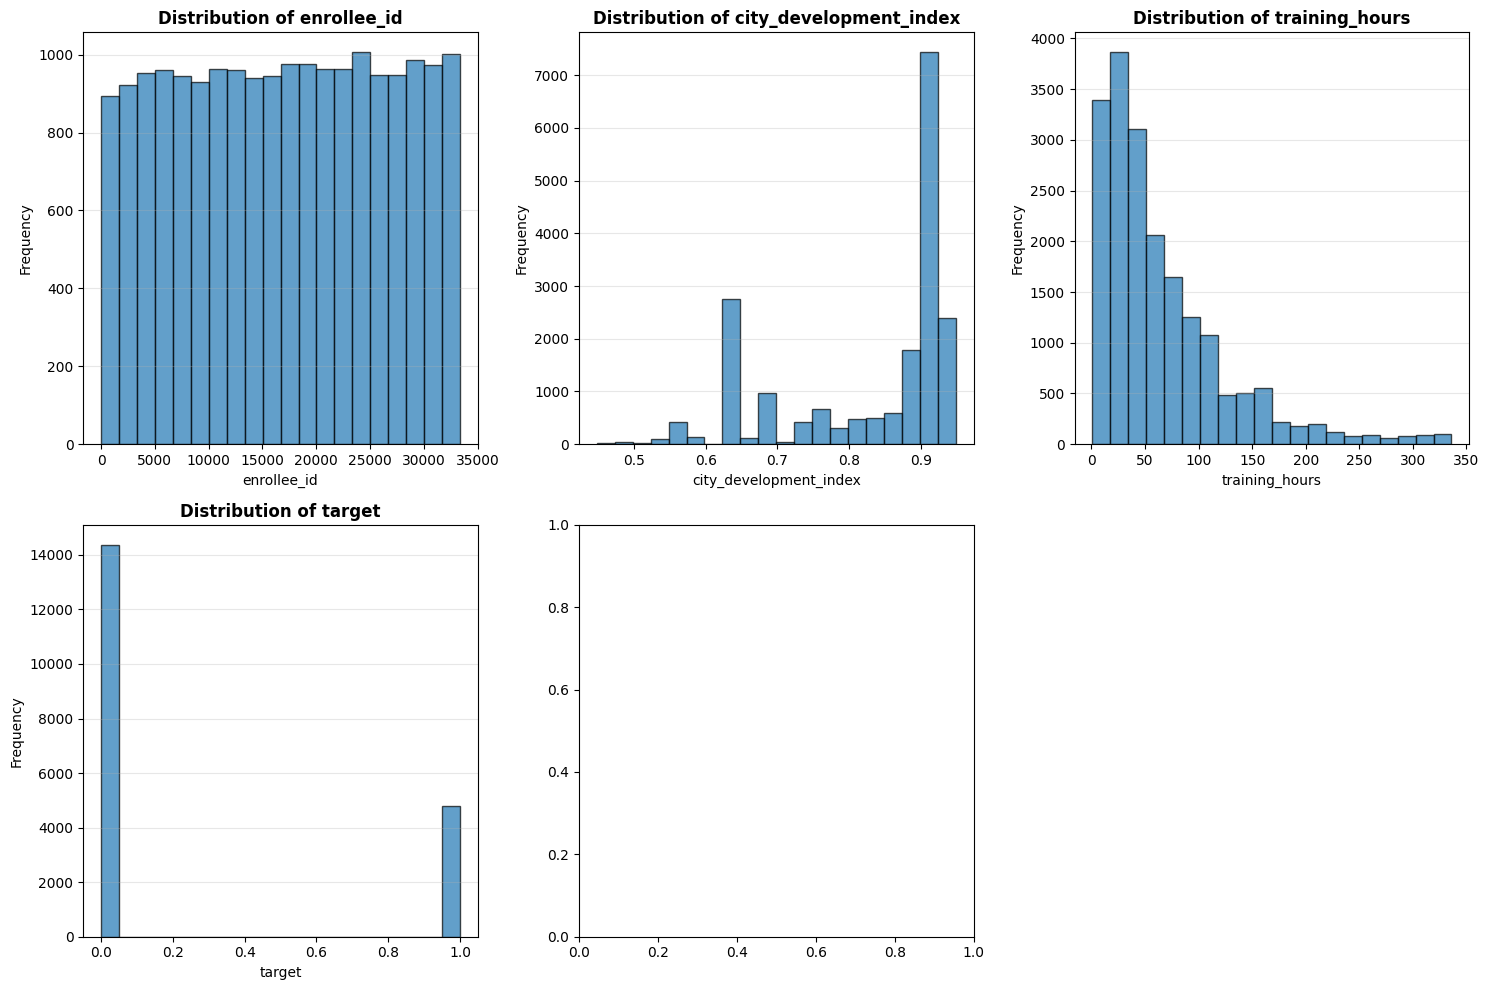

In [11]:
# Visualize distributions of numerical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=20, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)

# Remove empty subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

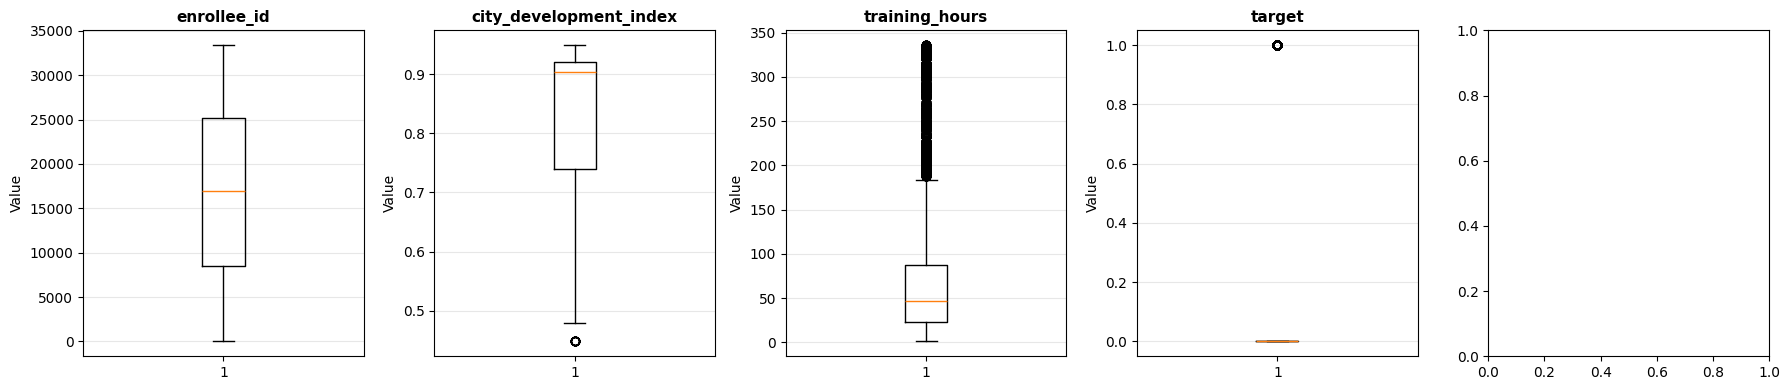

In [12]:
# Detect outliers using boxplots
fig, axes = plt.subplots(1, 5, figsize=(18, 4))

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col], vert=True)
    axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [13]:
# Quantitative outlier detection using IQR method
print("=" * 60)
print("OUTLIER DETECTION (IQR METHOD)")
print("=" * 60)

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"\n{col}:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Outliers detected: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")

OUTLIER DETECTION (IQR METHOD)

enrollee_id:
  Q1: 8554.25, Q3: 25169.75, IQR: 16615.50
  Bounds: [-16369.00, 50093.00]
  Outliers detected: 0 (0.0%)

city_development_index:
  Q1: 0.74, Q3: 0.92, IQR: 0.18
  Bounds: [0.47, 1.19]
  Outliers detected: 17 (0.1%)

training_hours:
  Q1: 23.00, Q3: 88.00, IQR: 65.00
  Bounds: [-74.50, 185.50]
  Outliers detected: 984 (5.1%)

target:
  Q1: 0.00, Q3: 0.00, IQR: 0.00
  Bounds: [0.00, 0.00]
  Outliers detected: 4777 (24.9%)


IndexError: index 8 is out of bounds for axis 0 with size 8

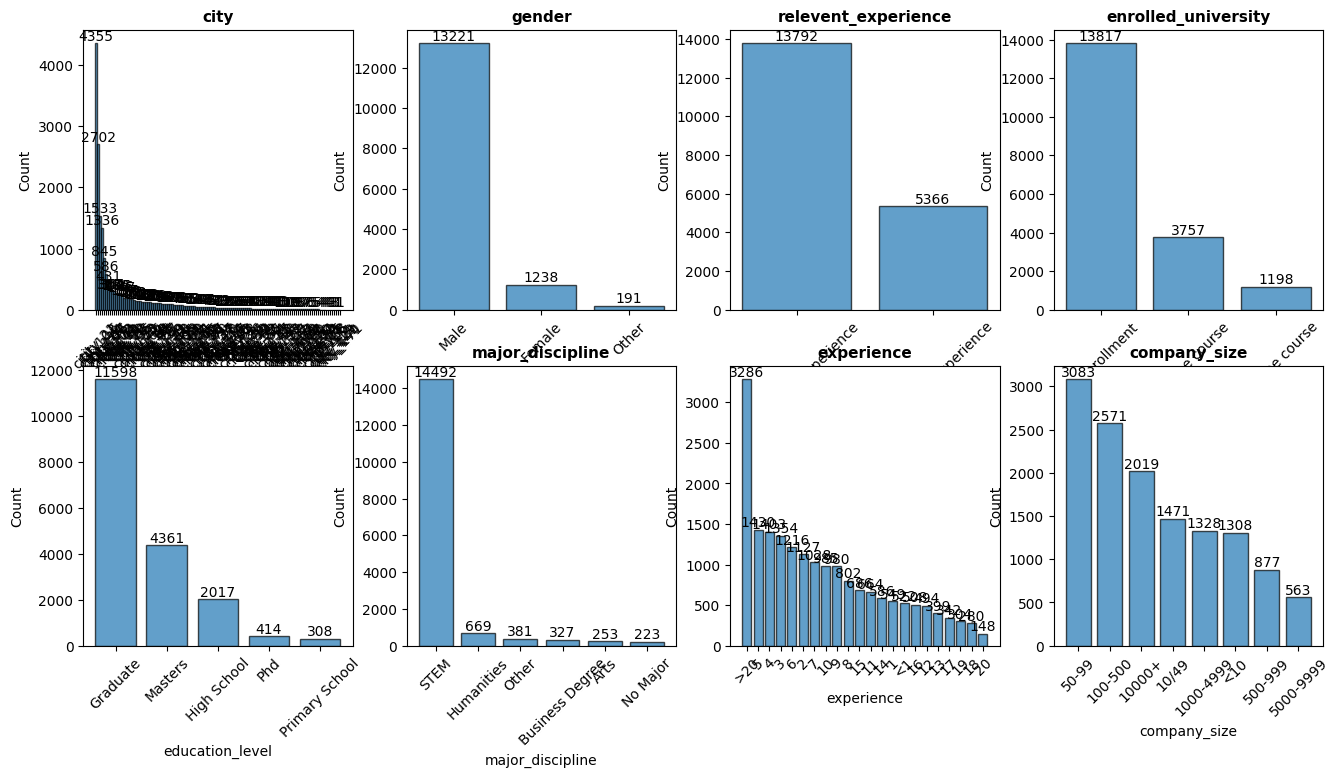

In [14]:
# Categorical features distribution
categorical_features = [col for col in categorical_cols if col != 'status']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    value_counts = df[col].value_counts()
    axes[idx].bar(value_counts.index, value_counts.values, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Add count labels on bars
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v + 1, str(v), ha='center', va='bottom')

# Remove empty subplot
fig.delaxes(axes[7])

plt.tight_layout()
plt.show()

#### Summary

**Numerical Feature Distributions:** The histogram analysis reveals that most numerical features exhibit approximately **normal distributions** with slight variations. Academic performance metrics (SSC, HSC, degree, and MBA percentages) are centered around their respective means (62-72%), with the majority of students scoring between 50% and 85%. The `emp_test_percentage` shows a more **uniform distribution** across its range, suggesting diverse performance levels on employment assessments. All features are naturally bounded within the percentage scale, maintaining consistency in measurement units.

**Outlier Analysis:** The IQR-based outlier detection identified **minimal outliers** across the dataset. Only **8 outliers (3.7%)** were detected in `hsc_percentage` and **1 outlier (0.5%)** in `degree_percentage`, while other features showed **no outliers**. The boxplots confirm this finding, with `hsc_percentage` displaying several lower-bound outliers (students with unusually low HSC scores around 37-42%). These outliers represent legitimate data points rather than errors and may provide valuable information about placement outcomes for lower-performing students. Given their small proportion, **no removal is recommended** at this stage.

**Categorical Feature Distributions:** The categorical features exhibit notable **class imbalances**. Gender distribution shows **139 males (64.7%)** versus **76 females (35.3%)**. Academic backgrounds reveal strong preferences: **Commerce dominates HSC subjects** (113 students), **Sci&Tech leads undergraduate degrees** (145 students), and most students lack **work experience (141 vs. 74)**. Board affiliations are relatively balanced between Central and Others. The **Mkt&Fin specialization** slightly outnumbers Mkt&HR (120 vs. 95). These imbalances should be considered during feature encoding and model interpretation, as minority classes may have reduced predictive power due to limited representation.

### 4.4 Target Feature Study

In [ ]:
# Target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
target_counts = df['target'].value_counts()
axes[0].bar(target_counts.index, target_counts.values, edgecolor='black', alpha=0.7, color=['red', 'green'])
axes[0].set_title('Target Distribution (Count)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Target (0=Not Looking, 1=Looking for Job Change)')
axes[0].set_ylabel('Count')
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 100, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
axes[1].pie(target_counts.values, labels=['Not Looking (0)', 'Looking (1)'], autopct='%1.1f%%', 
            startangle=90, colors=['red', 'green'], explode=(0.05, 0))
axes[1].set_title('Target Distribution (Proportion)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("=" * 60)
print("TARGET VARIABLE ANALYSIS")
print("=" * 60)
print(f"\nClass distribution:")
print(target_counts)
print(f"\nClass proportions:")
print(df['target'].value_counts(normalize=True).round(3))
print(f"\nClass imbalance ratio: {target_counts.max() / target_counts.min():.2f}:1")

In [ ]:
# Numerical features comparison by target class
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

# Exclude enrollee_id from comparison (it's just an identifier)
numerical_features_for_comparison = [col for col in numerical_cols if col not in ['enrollee_id', 'target']]

for idx, col in enumerate(numerical_features_for_comparison):
    looking = df[df['target'] == 1.0][col]
    not_looking = df[df['target'] == 0.0][col]
    
    axes[idx].hist([not_looking, looking], bins=15, label=['Not Looking (0)', 'Looking (1)'], 
                   edgecolor='black', alpha=0.7, color=['red', 'green'])
    axes[idx].set_title(f'{col} by Target', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Statistical comparison of numerical features by target class
print("=" * 60)
print("NUMERICAL FEATURES - MEAN COMPARISON BY TARGET")
print("=" * 60)

numerical_features_for_comparison = [col for col in numerical_cols if col not in ['enrollee_id', 'target']]
comparison = df.groupby('target')[numerical_features_for_comparison].mean()
comparison.index = ['Not Looking (0)', 'Looking (1)']
print("\nMean values by target class:")
print(comparison.round(2))

print("\n" + "=" * 60)
print("DIFFERENCE (Looking - Not Looking)")
print("=" * 60)
difference = comparison.loc['Looking (1)'] - comparison.loc['Not Looking (0)']
print(difference.round(2))

# Visualize mean comparison
comparison.T.plot(kind='bar', figsize=(10, 5), edgecolor='black', alpha=0.7, color=['red', 'green'])
plt.title('Mean Comparison of Numerical Features by Target', fontsize=13, fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Target')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Categorical features vs target - job change rates
categorical_features_for_analysis = [col for col in categorical_cols]

# Limit to top categories for high-cardinality features like 'city'
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_features_for_analysis[:10]):
    if col == 'city':
        # For city, show only top 10 cities
        top_cities = df[col].value_counts().head(10).index
        df_subset = df[df[col].isin(top_cities)]
        ct = pd.crosstab(df_subset[col], df_subset['target'], normalize='index') * 100
    else:
        ct = pd.crosstab(df[col], df['target'], normalize='index') * 100
    
    ct.plot(kind='bar', ax=axes[idx], edgecolor='black', alpha=0.7, color=['red', 'green'])
    axes[idx].set_title(f'Job Change Rate by {col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].legend(['Not Looking (0)', 'Looking (1)'], fontsize=7)
    axes[idx].tick_params(axis='x', rotation=45, labelsize=8)
    axes[idx].grid(axis='y', alpha=0.3)

# Remove empty subplots
for i in range(len(categorical_features_for_analysis[:10]), 12):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

#### Summary

The target variable analysis will be completed after running the visualization cells above. This section examines the relationship between predictor features and placement outcomes, revealing which characteristics are most strongly associated with successful job placement. Key areas of investigation include class imbalance quantification, numerical feature differences between placed and not-placed students, and placement rate variations across categorical features. These insights will inform feature selection and model training strategies in subsequent sections.

### 4.5 Feature Correlation & Selection

### 4.6 Unsupervised Clustering

### 4.7 Interpretations & Conclusions

---

## 5. ML Baseline & Ensemble Models

### 5.1 Train/Validation/Test Splits

### 5.2 Pipelines & Models

### 5.3 Training & Validation

### 5.4 Testing

### 5.5 Results Interpretation & Discussion

---

## 6. Enhanced Models & Hyperparameter Tuning

### 6.1 Justification of Choices

### 6.2 Hyperparameter Optimization

### 6.3 Final Results & Analysis

---

## 7. Conclusion